## 5.4 商品組合提案（關聯分析）

### 共通事前處理

In [1]:
# 取得中文字型
!wget 'https://github.com/flyingpath/electron-hand-dicom/raw/master/TaipeiSansTCBeta-Regular.ttf'

--2021-12-08 02:17:51--  https://github.com/flyingpath/electron-hand-dicom/raw/master/TaipeiSansTCBeta-Regular.ttf
Resolving github.com (github.com)... 140.82.112.4
Connecting to github.com (github.com)|140.82.112.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/flyingpath/electron-hand-dicom/master/TaipeiSansTCBeta-Regular.ttf [following]
--2021-12-08 02:17:51--  https://raw.githubusercontent.com/flyingpath/electron-hand-dicom/master/TaipeiSansTCBeta-Regular.ttf
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.108.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 20659344 (20M) [application/octet-stream]
Saving to: ‘TaipeiSansTCBeta-Regular.ttf’

TaipeiSansTCBeta-Re 100%[===================>]  19.70M  --.-KB/s    in 0.1s    

2021-12-08 02:17:51 

In [2]:
# 共通事前處理

# 隱藏不必要的警告
import warnings
warnings.filterwarnings('ignore')

# 匯入必要的函式庫
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import font_manager as fm

# 將字型新增到 matplotlib
fm.fontManager.addfont('./TaipeiSansTCBeta-Regular.ttf')

# 用來顯示資料框的函式
from IPython.display import display

# 調整顯示選項
# NumPy 的浮點數表示精度
np.set_printoptions(suppress=True, precision=4)

# pandas 中的浮點數表示精度
pd.options.display.float_format = '{:.4f}'.format

# 顯示資料框中的所有項目
pd.set_option("display.max_columns",None)

# 指定圖形的預設字體大小
plt.rcParams["font.size"] = 14

# 指定圖形的預設字型
plt.rcParams['font.family'] = 'Taipei Sans TC Beta'

# 隨機種子
random_seed = 123

原始連結  
http://archive.ics.uci.edu/ml/datasets/Online+Retail/

#### 資料項目備忘錄

InvoiceNo:  訂單編號  
StockCode: 商品編號  
Description: 商品說明  
Quantity: 商品數量   
InvoiceDate: 發票日期  
UnitPrice:  商品單價  
CustomerID: 客戶編號  
Country: 國名  

### 5.4.4 從載入資料到確認資料

#### 載入資料

In [3]:
# 載入資料
# 此公共資料集為 Excel 格式，可利用 read_excel 函式直接載入
# 請注意，會需要花費一點時間　（檔案大小約 23MB）
df = pd.read_excel('http://archive.ics.uci.edu/ml/\
machine-learning-databases/00352/Online%20Retail.xlsx')

# 將項目名稱替換成中文
columns = [
    '訂單編號', '商品編號', '商品說明', '商品數量', '發票日期', 
    '商品單價', '客戶編號', '國名'
]
df.columns = columns

#### 確認資料

In [4]:
# 確認資料筆數
print(df.shape[0])

# 確認資料內容
display(df.head())

541909


,訂單編號,商品編號,商品說明,商品數量,發票日期,商品單價,客戶編號,國名
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.5500,17850.0000,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.3900,17850.0000,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.7500,17850.0000,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.3900,17850.0000,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.3900,17850.0000,United Kingdom


In [5]:
# 確認缺失值
print(df.isnull().sum())

訂單編號         0
商品編號         0
商品說明      1454
商品數量         0
發票日期         0
商品單價         0
客戶編號    135080
國名           0
dtype: int64


In [6]:
# 確認國名
print(df['國名'].value_counts().head(10))

United Kingdom    495478
Germany             9495
France              8557
EIRE                8196
Spain               2533
Netherlands         2371
Belgium             2069
Switzerland         2002
Portugal            1519
Australia           1259
Name: 國名, dtype: int64


### 5.4.5 預處理資料
策略：   
* 提取訂單編號的第 1 個字元，建立「訂單類型」的行
* 利用「訂單類型」，只提取出有效訂單
* 將目標國家限定為法國
* 將資料轉換成 True/False 形式

#### 提取新訂單

In [7]:
# 新增「訂單類型」的行

# 複製資料以便進行預處理
df2 = df.copy()

# 將訂單編號的第 1 個字提取到另一個項目當中
# （5：新訂單 C：取消）
df2['訂單類型'] = df2['訂單編號'].map(lambda x: str(x)[0])

# 確認結果
display(df2.head())

# 確認類型的數量
print(df2['訂單類型'].value_counts())

,訂單編號,商品編號,商品說明,商品數量,發票日期,商品單價,客戶編號,國名,訂單類型
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.5500,17850.0000,United Kingdom,5
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.3900,17850.0000,United Kingdom,5
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.7500,17850.0000,United Kingdom,5
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.3900,17850.0000,United Kingdom,5
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.3900,17850.0000,United Kingdom,5


5    532618
C      9288
A         3
Name: 訂單類型, dtype: int64


In [8]:
# 只提取有效訂單
df2 = df2[df2['訂單類型']=='5']

# 確認筆數
print(df2.shape[0])

532618


#### 提取法國

In [9]:
# 將分析對象限定為法國
df3 = df2[df2['國名']=='France']

# 確認筆數
print(df3.shape[0])

8408


#### 轉換成 True / False

In [10]:
# 以訂單編號及商品編號為鍵，統計商品數量
w1 = df3.groupby(['訂單編號', '商品編號'])['商品數量'].sum()

# 確認結果
print(w1.head())

訂單編號    商品編號 
536370  10002    48
        21035    18
        21724    12
        21731    24
        21791    24
Name: 商品數量, dtype: int64


In [11]:
# 將商品編號移動到行（利用 unstack 函式)
w2 = w1.unstack().reset_index().fillna(0).set_index('訂單編號')

# 確認尺寸
print(w2.shape)

# 確認結果
display(w2.head())

(392, 1542)


商品編號     10002  10120  10125  10135  11001  15036  15039  16012  16048  16218  \
訂單編號                                                                            
536370 48.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000   
536852  0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000   
536974  0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000   
537065  0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000   
537463  0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000   

商品編號    16219  16225  16236  16237   16238  17174  20615  20617  20658  20665  \
訂單編號                                                                            
536370 0.0000 0.0000 0.0000 0.0000  0.0000 0.0000 0.0000 0.0000 0.0000 0.0000   
536852 0.0000 0.0000 0.0000 0.0000  0.0000 0.0000 0.0000 0.0000 0.0000 0.0000   
536974 0.0000 0.0000 0.0000 0.0000  0.0000 0.0000 0.0000 0.0000 0.0000 0.0000   
537065 0.0000 0.0000 0.0000 0.0000 28.0000 0.0000 0.0000 0.0000 0.0000 6.0000   
537463 0.0000 0.0000 0.0000 0.0000  0.0000 0.0000 0.0000 0.0000 0.0000 0.0000   

商品編號    20668  20674  20675  20676  20677  20679  20681  20682  20684  20685  \
訂單編號                                                                           
536370 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000   
536852 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000   
536974 0.0000 0.0000 0.0000 0.0000 0.0000 6.0000 0.0000 0.0000 0.0000 0.0000   
537065 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000   
537463 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 6.0000 6.0000 0.0000 0.0000   

商品編號    20686  20702  20704  20711  20712  20713  20717  20718   20719  20723  \
訂單編號                                                                            
536370 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000  0.0000 0.0000   
536852 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000  0.0000 0.0000   
536974 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000  0.0000 0.0000   
537065 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000  0.0000 0.0000   
537463 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 10.0000 0.0000   

商品編號    20724   20725   20726  20727   20728  20749  20750  20751  20767  \
訂單編號                                                                       
536370 0.0000  0.0000  0.0000 0.0000  0.0000 0.0000 0.0000 0.0000 0.0000   
536852 0.0000  0.0000  0.0000 0.0000  0.0000 0.0000 0.0000 0.0000 0.0000   
536974 0.0000 10.0000 10.0000 0.0000  0.0000 2.0000 2.0000 0.0000 0.0000   
537065 0.0000 10.0000 20.0000 0.0000 10.0000 2.0000 6.0000 0.0000 0.0000   
537463 0.0000  0.0000  0.0000 0.0000  0.0000 0.0000 0.0000 0.0000 0.0000   

商品編號    20777  20819  20832  20866  20914  20961  20963  20966  20967  20971  \
訂單編號                                                                           
536370 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000   
536852 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000   
536974 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000   
537065 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000   
537463 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000   

商品編號    20972  20973  20974  20975  20977  20978  20979  20981  20983  20984  \
訂單編號                                                                           
536370 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000   
536852 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000   
536974 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000   
537065 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000   
537463 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000   

商品編號    20992  20996  21003  21012  21026  21027  21030  21034   21035  21039  \

In [12]:
# 根據統計結果為正數或 0 來設定 True/False
basket_df = w2.apply(lambda x: x>0)

# 確認結果
display(basket_df.head())

商品編號    10002  10120  10125  10135  11001  15036  15039  16012  16048  16218  \
訂單編號                                                                           
536370   True  False  False  False  False  False  False  False  False  False   
536852  False  False  False  False  False  False  False  False  False  False   
536974  False  False  False  False  False  False  False  False  False  False   
537065  False  False  False  False  False  False  False  False  False  False   
537463  False  False  False  False  False  False  False  False  False  False   

商品編號    16219  16225  16236  16237  16238  17174  20615  20617  20658  20665  \
訂單編號                                                                           
536370  False  False  False  False  False  False  False  False  False  False   
536852  False  False  False  False  False  False  False  False  False  False   
536974  False  False  False  False  False  False  False  False  False  False   
537065  False  False  False  False   True  False  False  False  False   True   
537463  False  False  False  False  False  False  False  False  False  False   

商品編號    20668  20674  20675  20676  20677  20679  20681  20682  20684  20685  \
訂單編號                                                                           
536370  False  False  False  False  False  False  False  False  False  False   
536852  False  False  False  False  False  False  False  False  False  False   
536974  False  False  False  False  False   True  False  False  False  False   
537065  False  False  False  False  False  False  False  False  False  False   
537463  False  False  False  False  False  False   True   True  False  False   

商品編號    20686  20702  20704  20711  20712  20713  20717  20718  20719  20723  \
訂單編號                                                                           
536370  False  False  False  False  False  False  False  False  False  False   
536852  False  False  False  False  False  False  False  False  False  False   
536974  False  False  False  False  False  False  False  False  False  False   
537065  False  False  False  False  False  False  False  False  False  False   
537463  False  False  False  False  False  False  False  False   True  False   

商品編號    20724  20725  20726  20727  20728  20749  20750  20751  20767  20777  \
訂單編號                                                                           
536370  False  False  False  False  False  False  False  False  False  False   
536852  False  False  False  False  False  False  False  False  False  False   
536974  False   True   True  False  False   True   True  False  False  False   
537065  False   True   True  False   True   True   True  False  False  False   
537463  False  False  False  False  False  False  False  False  False  False   

商品編號    20819  20832  20866  20914  20961  20963  20966  20967  20971  20972  \
訂單編號                                                                           
536370  False  False  False  False  False  False  False  False  False  False   
536852  False  False  False  False  False  False  False  False  False  False   
536974  False  False  False  False  False  False  False  False  False  False   
537065  False  False  False  False  False  False  False  False  False  False   
537463  False  False  False  False  False  False  False  False  False  False   

商品編號    20973  20974  20975  20977  20978  20979  20981  20983  20984  20992  \
訂單編號                                                                           
536370  False  False  False  False  False  False  False  False  False  False   
536852  False  False  False  False  False  False  False  False  False  False   
536974  False  False  False  False  False  False  False  False  False  False   
537065  False  False  False  False  False  False  False  False  False  False   
537463  False  False  False  False  False  False  False  False  False  False   

商品編號    20996  21003  21012  21026  21027  21030  21034  21035  21039  21

### 專欄 建立商品名稱字典
以下解說請見 [支援網站](https://github.com/makaishi2/profitable_ai_book_info/blob/master/docs/C2-実習コーディング補足解説.md#C21) 。  
請注意，以下的 cell 也必須執行，若不執行，會使後面的 cell 出現錯誤。


#### 為方便之後分析，建立「商品編號」與「商品說明」的對照表

In [13]:
# 只提取「商品編號」與「商品說明」
w3 = df2[['商品編號', '商品說明']].drop_duplicates()

# 將商品編號與商品名稱全部轉換成字串
w3['商品編號'] = w3['商品編號'].astype('str')
w3['商品說明'] = w3['商品說明'].astype('str')

# 以商品編號為索引
w3 = w3.set_index('商品編號')
display(w3.head())

,商品說明
商品編號,
85123A,WHITE HANGING HEART T-LIGHT HOLDER
71053,WHITE METAL LANTERN
84406B,CREAM CUPID HEARTS COAT HANGER
84029G,KNITTED UNION FLAG HOT WATER BOTTLE
84029E,RED WOOLLY HOTTIE WHITE HEART.


In [14]:
# 提取開頭的 5 個商品編號
item_list1 = w3.index[:5]

# 針對 w3 的搜尋結果
display(w3.loc[item_list1])

,商品說明
商品編號,
85123A,WHITE HANGING HEART T-LIGHT HOLDER
85123A,?
85123A,wrongly marked carton 22804
85123A,CREAM HANGING HEART T-LIGHT HOLDER
71053,WHITE METAL LANTERN
71053,WHITE MOROCCAN METAL LANTERN
84406B,CREAM CUPID HEARTS COAT HANGER
84406B,incorrectly made-thrown away.
84406B,?


In [15]:
# 只提取大寫的文字

# 複製以方便處理
w4 = w3.copy()

# 只留下全是大寫名稱的列
w4 = w4[w4['商品說明'].map(lambda x: x.isupper())]

# 利用剛才建立的 item_list1 確認結果
display(w4.loc[item_list1])

,商品說明
商品編號,
85123A,WHITE HANGING HEART T-LIGHT HOLDER
85123A,CREAM HANGING HEART T-LIGHT HOLDER
71053,WHITE METAL LANTERN
71053,WHITE MOROCCAN METAL LANTERN
84406B,CREAM CUPID HEARTS COAT HANGER
84029G,KNITTED UNION FLAG HOT WATER BOTTLE
84029E,RED WOOLLY HOTTIE WHITE HEART.


#### 多種名稱的處理方式
若有多種名稱，便選擇最長的名稱來建立商品名稱字典（item_dict）

In [16]:
# 提取最長的名稱

# 複製以方便處理
w5 = w4.copy()

# 新增「字數」行
w5['字數'] = w5['商品說明'].map(len)

# 排序
w5 = w5.sort_values(['商品編號', '字數'], ascending=[True, False])

# 提取各商品編號最長的商品說明並代入 item_dict
item_dict = w5.groupby('商品編號')['商品說明'].agg(lambda x: x[0])

# 利用剛才建立的 item_list1 確認結果
display(item_dict.loc[item_list1])

商品編號
85123A     WHITE HANGING HEART T-LIGHT HOLDER
71053            WHITE MOROCCAN METAL LANTERN
84406B         CREAM CUPID HEARTS COAT HANGER
84029G    KNITTED UNION FLAG HOT WATER BOTTLE
84029E         RED WOOLLY HOTTIE WHITE HEART.
Name: 商品說明, dtype: object

### 5.4.6 選擇演算法與分析
利用 mlxtend 套件 (開發者 Sebastian Raschka) 的 association_rules 與 appriori 演算法

In [17]:
# 載入套件
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

In [18]:
# 先驗分析
freq_items1 = apriori(basket_df, min_support = 0.06, 
    use_colnames = True)

# 確認結果
display(freq_items1.sort_values('support', 
    ascending = False).head(10))

# 確認 itemset 數量
print(freq_items1.shape[0])

,support,itemsets
61,0.7653,(POST)
52,0.1888,(23084)
14,0.1811,(21731)
37,0.1709,(22554)
39,0.1684,(22556)
114,0.1658,"(23084, POST)"
24,0.1582,(22326)
82,0.1582,"(21731, POST)"
4,0.1531,(20725)
89,0.1480,"(22326, POST)"


134


In [19]:
# 建立關聯規則
a_rules1 = association_rules(freq_items1, metric = "lift",
    min_threshold = 1)

# 按增益值排序
a_rules1 = a_rules1.sort_values('lift',
    ascending = False).reset_index(drop=True)

# 確認結果
display(a_rules1.head(10))

# 確認規則數量
print(a_rules1.shape[0])

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(23254),(23256),0.0714,0.0689,0.0638,0.8929,12.9630,0.0589,8.6905
1,(23256),(23254),0.0689,0.0714,0.0638,0.9259,12.9630,0.0589,12.5357
2,(22727),"(22728, 22726)",0.0944,0.0740,0.0638,0.6757,9.1333,0.0568,2.8552
3,"(22728, 22726)",(22727),0.0740,0.0944,0.0638,0.8621,9.1333,0.0568,6.5657
4,"(22726, POST)",(22727),0.0842,0.0944,0.0714,0.8485,8.9894,0.0635,5.9770
5,(22727),"(22726, POST)",0.0944,0.0842,0.0714,0.7568,8.9894,0.0635,3.7650
6,(22726),"(22728, 22727)",0.0969,0.0740,0.0638,0.6579,8.8929,0.0566,2.7068
7,"(22728, 22727)",(22726),0.0740,0.0969,0.0638,0.8621,8.8929,0.0566,6.5472
8,(22727),(22726),0.0944,0.0969,0.0791,0.8378,8.6430,0.0699,5.5689
9,(22726),(22727),0.0969,0.0944,0.0791,0.8158,8.6430,0.0699,4.9162


206


In [20]:
# 列出關聯性較高商品的商品編號
item_list = ['23254', '23256', '22726', '22727', '22728']

# 察看商品說明
for item in item_list:
    print(item, item_dict[item])

23254 CHILDRENS CUTLERY DOLLY GIRL 
23256 CHILDRENS CUTLERY SPACEBOY 
22726 ALARM CLOCK BAKELIKE GREEN
22727 ALARM CLOCK BAKELIKE RED 
22728 ALARM CLOCK BAKELIKE PINK


### 5.4.7 調整
將 min_support 的值變更為 0.065 之後，進行與 5.4.6 相同的分析

In [21]:
# 先驗分析
freq_items2 = apriori(basket_df, min_support = 0.065, 
    use_colnames = True)

# 建立關聯規則
a_rules2 = association_rules(freq_items2, metric = "lift",
    min_threshold = 1)

# 按增益值排序
a_rules2 = a_rules2.sort_values('lift',
    ascending = False).reset_index(drop=True)

# 確認結果
display(a_rules2.head(10))

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(22727),"(22726, POST)",0.0944,0.0842,0.0714,0.7568,8.9894,0.0635,3.7650
1,"(22726, POST)",(22727),0.0842,0.0944,0.0714,0.8485,8.9894,0.0635,5.9770
2,(22726),(22727),0.0969,0.0944,0.0791,0.8158,8.6430,0.0699,4.9162
3,(22727),(22726),0.0944,0.0969,0.0791,0.8378,8.6430,0.0699,5.5689
4,(22726),"(POST, 22727)",0.0969,0.0867,0.0714,0.7368,8.4954,0.0630,3.4704
5,"(POST, 22727)",(22726),0.0867,0.0969,0.0714,0.8235,8.4954,0.0630,5.1173
6,"(22728, POST)",(22727),0.0893,0.0944,0.0663,0.7429,7.8703,0.0579,3.5218
7,(22727),"(22728, POST)",0.0944,0.0893,0.0663,0.7027,7.8703,0.0579,3.0633
8,(22728),(22727),0.1020,0.0944,0.0740,0.7250,7.6811,0.0643,3.2931
9,(22727),(22728),0.0944,0.1020,0.0740,0.7838,7.6811,0.0643,4.1531


從 apriori 的 2 的結果中提取與「23254」和「23256」有關的項目

In [22]:
# 調查對象的集合
t_set = set([23254, 23256])

# 從第 1 次的分析 freq_item1 中提取對應的列
idx1 = freq_items1['itemsets'].map(
    lambda x: not x.isdisjoint(t_set))
item1 = freq_items1[idx1]

# 從第 2 次的分析 freq_item2 中提取對應的列
idx2 = freq_items2['itemsets'].map(
    lambda x: not x.isdisjoint(t_set))
item2 = freq_items2[idx2]

# 確認結果
display(item1)
display(item2)

,support,itemsets
58,0.0714,(23254)
59,0.0689,(23256)
118,0.0638,"(23256, 23254)"


,support,itemsets
53,0.0714,(23254)
54,0.0689,(23256)


### 5.4.8 繪製圖形
利用有向圖呈現商品之間的關係。  
解說請參考[支援網站](https://github.com/makaishi2/profitable_ai_book_info/blob/master/docs/C2-実習コーディング補足解説.md#C22) 。

#### 提取節點

In [23]:
# 將目標關係限定為增益值排名前20名
a = a_rules1.head(20)

# 提取父節點 (antecedents 表示先購買的商品)
ant = a['antecedents'].values
ant = [tuple(x) for x in ant]

# 提取子節點 (consequents 表示會接續購買的商品)
con = a['consequents'].values
con = [tuple(x) for x in con]

# 列出所有節點 (包括父節點與其子節點)
both = ant + con
both = list(set(both))

# 確認部分結果
print(both[:10])

[(21080, 21086), (22726, 22727), (23254,), (22728, 'POST'), (22728,), ('POST', 22727), (22726,), (22728, 22727), (22726, 'POST'), (22727,)]


#### 建立關係圖

In [24]:
# 匯入 networkx 套件
import networkx as nx

# 初始化關係圖
G = nx.DiGraph()

# 新增節點 (將父節點與子節點都納入關係圖中)
for n in both:
  G.add_node(n)

# 新增邊線 (建立父節點與子節點的連接線)
for i in range(len(a)):
    item = a.loc[i]
    ant = tuple(item['antecedents'])
    con = tuple(item['consequents'])
    G.add_edge(ant, con)

#### 繪製圖形

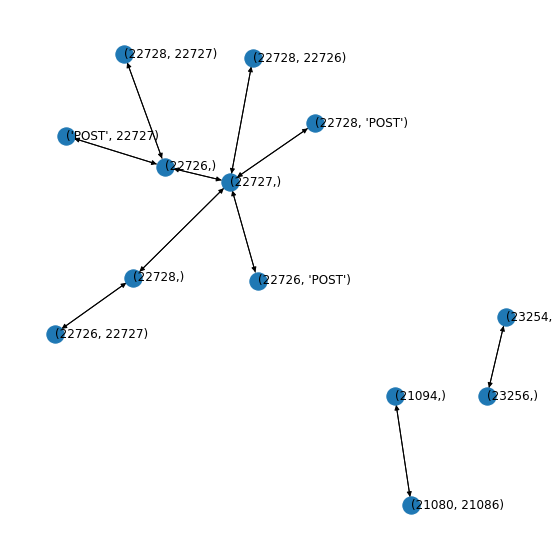

In [25]:
# 繪製圖形 (k=0.6 可調整點與點距離的比例)
pos = nx.spring_layout(G, k=0.6, seed=random_seed)

plt.figure(figsize=(8, 8))
nx.draw_networkx_nodes(G, pos)
nx.draw_networkx_edges(G, pos)
nx.draw_networkx_labels(G, pos,
    horizontalalignment='left', 
    verticalalignment='center')
plt.axis('off')
plt.tight_layout()
plt.show()